In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
import statistics
%matplotlib inline

In [2]:
Hidalgo=pd.read_csv('Hidalgo.csv', encoding='latin-1')
Hgodeagrup=pd.read_csv('hidalgosingroup.csv')

In [ ]:
Hidalgo

In [3]:
Hidalgo

,index,Fecha,Entidad,conteo,Acumulados
0,7,2020-02-27,HIDALGO,1,1
1,71,2020-03-15,HIDALGO,1,2
2,101,2020-03-17,HIDALGO,2,4
3,164,2020-03-20,HIDALGO,3,7
4,189,2020-03-21,HIDALGO,3,10
5,229,2020-03-23,HIDALGO,1,11
6,256,2020-03-24,HIDALGO,1,12
7,283,2020-03-25,HIDALGO,5,17
8,305,2020-03-26,HIDALGO,4,21
9,329,2020-03-27,HIDALGO,4,25


In [4]:
Z=1.96
p=0.5
q=0.5
N=812
E=0.05
n=((Z**2)*q*p*812)/((812*(E**2))+((Z**2)*p*q))
n

260.7827715355805

In [7]:
Hgodeagrup=Hgodeagrup.drop('index',axis=1)
Hgodeagrup

,ENTIDAD_RES,FECHA_INGRESO
0,HIDALGO,01/05/2020
1,HIDALGO,28/04/2020
2,HIDALGO,06/05/2020
3,HIDALGO,06/05/2020
4,HIDALGO,30/04/2020
...,...,...
807,HIDALGO,06/05/2020
808,HIDALGO,29/04/2020
809,HIDALGO,03/05/2020
810,HIDALGO,12/05/2020


In [10]:
aleatorio=np.random.randint(0,811,261)
aleatorio

array([559, 724, 439, 412,  56, 365, 186,  61, 385, 277, 654, 406, 420,
       381, 135, 799, 450,  78, 801, 277,  73, 760, 316, 776, 469, 197,
       320, 337, 636, 301,  14,  34, 378, 683, 669, 435, 110, 262, 325,
       669, 728, 794, 684, 508, 218, 726, 438, 276, 544, 268, 614, 403,
        94, 185, 791, 617,  56, 290, 409, 377, 543, 509, 176,  20, 329,
       526, 386, 151,  46, 519, 724, 601, 418, 763, 291, 467, 362, 474,
       220, 236, 352, 772, 227, 244,   1, 274,  67, 116, 430, 759, 141,
       202, 604, 329, 730, 288, 468, 176, 544, 343, 743, 808, 647, 562,
       236, 292, 403,  73, 550, 456, 140, 810, 782, 193, 748, 100, 615,
       412, 299, 597, 299, 564, 540, 227, 432, 640, 590, 131, 692, 569,
        53, 750, 489, 495,  35, 350, 605, 637, 397,  85,   6, 509, 734,
       234, 474, 550, 554, 652, 757, 461, 740, 124, 148, 142, 660, 205,
       808, 192, 642, 222, 471, 765, 129, 796, 728, 320, 161, 231, 193,
       763, 629, 134, 113, 569,  20, 735, 143, 287, 385, 275, 40

In [12]:
len(aleatorio)

261

In [14]:
Filter_df  = Hgodeagrup.loc[aleatorio]
len(Filter_df)

261

In [40]:
filtrado=Filter_df.groupby(Filter_df['FECHA_INGRESO']).count().reset_index()
filtrado['FECHA_INGRESO']=list(map(lambda x: datetime.strptime(x,'%d/%m/%Y').date(), filtrado['FECHA_INGRESO']))
filtrado=filtrado.sort_values('FECHA_INGRESO')
filtrado=filtrado.rename(columns={"ENTIDAD_RES": 'CONTEO'})
filtrado

,FECHA_INGRESO,CONTEO
29,2020-03-20,1
34,2020-03-24,1
36,2020-03-25,1
38,2020-03-26,2
40,2020-03-27,1
45,2020-03-31,2
0,2020-04-01,1
3,2020-04-03,1
6,2020-04-05,2
9,2020-04-07,3


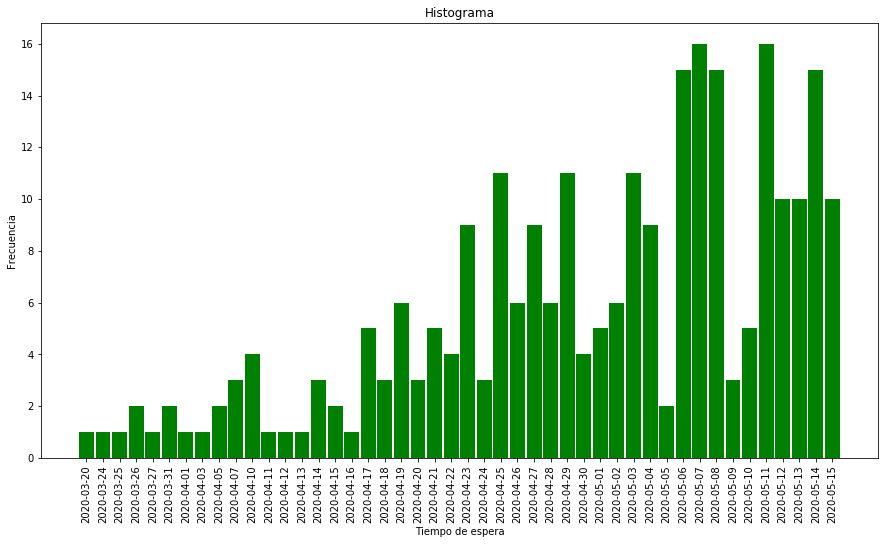

In [48]:
x_pos = [str(i) for i in filtrado['FECHA_INGRESO']]
plt.figure(figsize=(15,8))
plt.bar(x_pos,filtrado['CONTEO'],width=0.9,color='green')
plt.xticks(rotation=90)
plt.title("Histograma")
plt.xlabel("Calificaciones finales")
plt.xlabel("Tiempo de espera")
plt.ylabel("Frecuencia")
plt.show()

In [49]:
N=sum(filtrado['CONTEO'])
np.mean(filtrado['CONTEO'])

5.673913043478261

In [52]:
N/46

5.673913043478261

In [54]:
stats.mode(filtrado['CONTEO'])

ModeResult(mode=array([1], dtype=int64), count=array([10]))

In [57]:
al=max(filtrado['CONTEO'])
ba=min(filtrado['CONTEO'])
print(al,ba)
np.median(filtrado['CONTEO'])

16 1


4.0

In [64]:
Edades=pd.read_csv('Edad_con.csv')
Edades.drop('Unnamed: 0', axis=1)

,EDAD
0,65
1,52
2,28
3,49
4,41
...,...
47139,33
47140,26
47141,30
47142,45


- Z=1.96
- p=0.5
- q=0.5
- N=47144
- E=0.05
\begin{align}
n=\frac{(Z^2)*q*p*N}{(N*(E^2))+((Z^2)*p*q)}
\end{align}

Sustituyendo:

\begin{align}
n=\frac{(1.96^2)*0.5*0.5*47144}{(47144*(0.05^2))+((1.96^2)*0.5*0.5)}
\end{align}

In [66]:
Z=1.96
p=0.5
q=0.5
N=47144
E=0.05
n=((Z**2)*q*p*N)/((N*(E**2))+((Z**2)*p*q))
n

381.0549164958204

In [92]:
aleato_ed=np.random.randint(0,47143,381)
aleato_ed

array([ 2070, 23726,  5760, 21015, 23335, 34849, 28586,  1523,  8451,
       26337, 32816, 25883, 22559, 14002, 25770, 14039, 16797, 21676,
       23465,  8624, 14103, 31073, 41336, 26727, 28295, 31271, 43709,
       20548, 32920, 42891, 29980, 34303,  4799,  2083, 19190, 20464,
       20198, 39265, 43804, 26412, 12767,  3936, 15475, 27805, 44807,
        3376, 13420,  2482,  3188, 16288,  9242,  3614, 34711, 16438,
       38561, 12852, 39103, 28806, 20693, 39492, 41529, 25402, 10039,
       16516, 21608,  2206, 23326, 17014, 16522,  7802,  6952, 22105,
       35943,  9940, 35553,   663, 32122, 30127, 43811,  6264, 11943,
       18551, 21703, 21270, 24109, 39294, 45240, 25881, 28353, 30685,
       42000,  3460,  1400, 17024, 13350,  3492, 39429, 42115, 14988,
       11321, 18056, 10155, 43166, 23800, 38081,  4676, 35375, 23942,
       36823,  4267, 15237, 11678, 46480, 24972, 30745, 31970, 10009,
       16483, 42144, 29540, 16150,   312, 31243, 36813, 24406,  3501,
        8924, 28543,

In [93]:
Filter_ed  = Edades.loc[aleato_ed]
Filter_ed.drop('Unnamed: 0',axis=1)

,EDAD
2070,73
23726,57
5760,43
21015,49
23335,44
...,...
36795,38
2005,44
34814,51
34518,62


In [94]:
filt_ed=Filter_ed.groupby(Filter_ed['EDAD']).count().reset_index()
filt_ed=filt_ed.sort_values('EDAD')
filt_ed=filt_ed.rename(columns={"Unnamed: 0": 'CONTEO'})
filt_ed

,EDAD,CONTEO
0,8,1
1,11,1
2,14,1
3,16,3
4,17,1
...,...,...
62,78,1
63,80,1
64,82,1
65,83,2


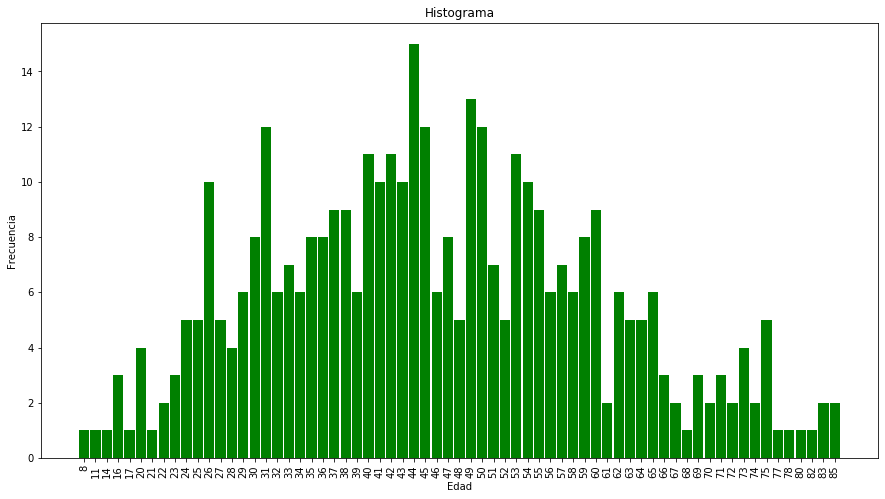

In [95]:
x_pos = [str(i) for i in filt_ed['EDAD']]
plt.figure(figsize=(15,8))
plt.bar(x_pos,filt_ed['CONTEO'],width=0.9,color='green')
plt.xticks(rotation=90)
plt.title("Histograma")
plt.xlabel("Calificaciones finales")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

In [98]:
N=sum(Filter_ed['EDAD'])
N/381

45.79002624671916

In [99]:
N

17446

\begin{align}
\sum_{i=1}^{n}Edad_{i}=17446
\end{align}

\begin{align}
Media=\frac{17446}{381}=45.79
\end{align}

In [100]:
stats.mode(Filter_ed['EDAD'])

ModeResult(mode=array([44], dtype=int64), count=array([15]))

In [101]:
al=max(Filter_ed['EDAD'])
ba=min(Filter_ed['EDAD'])
print(al,ba)
np.median(Filter_ed['EDAD'])

85 8


45.0

In [102]:
382/2

191.0

\begin{align}
Mediana=\frac{381+1}{2}=191
\end{align}

In [116]:
f=Filter_ed.sort_values('EDAD').reset_index().drop(['index','Unnamed: 0'],axis=1)

In [121]:
f[190:194]

,EDAD
190,45
191,45
192,45
193,45


In [146]:
sed=0
for i in Filter_ed['EDAD']:
    sed+=(i-45.79)**2
sed

81749.20210000008

\begin{align}
\sum_{i=1}^{n}(x_{i}-\bar{x})^2=81749.20210000008
\end{align}


\begin{align}
S^2=\frac{81749.20210000008}{381-1}=215.12947921052654
\end{align}

In [137]:
s=sed/(381-1)
s

215.12947921052654

In [138]:
np.sqrt(s)

14.667292838507267

\begin{align}
\sqrt{S^2}=\sqrt{215.12947921052654}=14.667292838507267
\end{align}

In [130]:
np.var(Filter_ed['EDAD'])

214.5648349074477

In [142]:
print('El valor máximo de lamuestra es: ',max(f['EDAD']))
print('El valor minimo de lamuestra es: ',min(f['EDAD']))
print('El rango es: ', max(f['EDAD'])-min(f['EDAD']))

El valor máximo de lamuestra es:  85
El valor minimo de lamuestra es:  8
El rango es:  77
